# Elon-Musk Tweets

In [1]:
#Import Libraries
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Elon_musk.csv",encoding='unicode_escape')

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Performing EDA

In [4]:
df.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop(columns=('Unnamed: 0'),axis=1)

In [7]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Preprocessing

step 1 - Remove space and symbol

In [8]:
df.Text=df.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [9]:
df

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...
...,...
1994,flcnhvy True it sounds so surreal but the nega...
1995,PPathole Make sure to read ur terms amp condit...
1996,TeslaGong PPathole Samwise Gamgee
1997,PPathole Altho Dumb and Dumber is UFUF


Step 2 - Make text to lower

In [10]:
df.Text=df.Text.apply(lambda x: x.lower())

In [11]:
df

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is ufuf


# Step 3- Splitting the words from line

In [12]:
df.Text=df.Text.apply(lambda x: x.split())

In [13]:
df

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


# Step 4- Removing Stop words

In [15]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [16]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
df.Text=df.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [18]:
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."
...,...
1994,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, dumber, ufuf]"


# Step 5- Stemming

In [19]:
ps = PorterStemmer()  
df.Text=df.Text.apply(lambda x: [ps.stem(word) for word in x])

In [20]:
df

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...
1994,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, dumber, ufuf]"


# Step 6-Rejoining

In [21]:
df.Text=df.Text.apply(lambda x: " ".join(x))

In [22]:
df

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


In [23]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis

In [24]:
from textblob import TextBlob
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


# Problem statement - 2

1 Extract reviews of any product from ecommerce website like amazon
2 Perform emotion mining

In [25]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
link='https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [27]:
## Getting reviews of first five pages
review_list=[]

for k in range(0,6):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/Kindle-10th-Gen/product-reviews/B07FQ4Q7MB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5


In [28]:
review_list

['Built in light',
 'But i can connect all wifi or Hotspot except My Phone. Easy to Read. Backlight is good',
 'I am writing this for who are confused between kindle basic and paperwhite. If money is not a concern, go for paper white edition -it is worthy.1) Better display2) water resistance3) Type c port4) Better performance and battery.5) Reading mode and Dark modeBut kindle basic does the job, it is compact and except the advantages mentioned above. For pdf articles or research papers kindle is not good. For Books and novels it is the best, the feel is same as book and even better. We can read it in dark during night because of the backlight. I bought kindle basic and fully satisfied with the purchase.',
 'Good quality. Looks slow to use. But according to brotherwhom I gifted, apparently it works like that.',
 'Absolutely amazing.Best investment ever',
 "I think the best value for money E-Reader in Kindle range.Pros:1. Compact Size but, enough to read nicely.2. Easily Transfer E-boo

In [29]:
len(review_list)

30

In [30]:
rv=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
rv

,Reviews
0,Built in light
1,But i can connect all wifi or Hotspot except My Phone. Easy to Read. Backlight is good
2,"I am writing this for who are confused between kindle basic and paperwhite. If money is not a concern, go for paper white edition -it is worthy.1) Better display2) water resistance3) Type c port4) Better performance and battery.5) Reading mode and Dark modeBut kindle basic does the job, it is compact and except the advantages mentioned above. For pdf articles or research papers kindle is not good. For Books and novels it is the best, the feel is same as book and even better. We can read it in dark during night because of the backlight. I bought kindle basic and fully satisfied with the purchase."
3,"Good quality. Looks slow to use. But according to brotherwhom I gifted, apparently it works like that."
4,Absolutely amazing.Best investment ever
5,"I think the best value for money E-Reader in Kindle range.Pros:1. Compact Size but, enough to read nicely.2. Easily Transfer E-book files using send to Kindle facility using your phone also via e-mail.3. Paper like matte screen surface unlike it's costly version paperwhite or Oasis.4. 4 LEDs are more than enough for this tiny reader to make easy reading in dark.Cons1. Little laggy in displaying picture or changing pages but not that much annoyance.2. Less PPI which will deteriorate the quality of pictures but not a problem in reading text.3. No inverted display mode, hope they will add this feature using merely a software update. I think they disabled this feature due to other models marketing feature.Over-all a good product by considering the price of ₹6499 availed on Big Billion Day."
6,Touch screen response is a bit slow and sluggish could have been better. There should be screen 📴 after switching the power off button.
7,Reading experience
8,My last kindle battery was giving problems after 7 years so bought a new one but the battery takes 5 hours for charging and lasts 2 days only
9,"Initially device will feel sluggish, but you need to get used to it. There might be some software update available in Settings and after update UI will provide better UX.I feel it is overpriced, it should've been priced ~₹5000."


# Preprocessing

In [31]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [32]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
ps=PorterStemmer()

In [34]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [35]:
rv["Reviews"]=rv["Reviews"].apply(rvpreprocess)

In [36]:
rv.head()

,Reviews
0,built light
1,connect wifi hotspot except phone easi read backlight good
2,write confus kindl basic paperwhit money concern go paper white edit worthi better display water resist type c port better perform batteri read mode dark modebut kindl basic job compact except advantag mention pdf articl research paper kindl good book novel best feel book even better read dark night backlight bought kindl basic fulli satisfi purchas
3,good qualiti look slow use accord brotherwhom gift appar work like
4,absolut amazingbest invest ever


In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


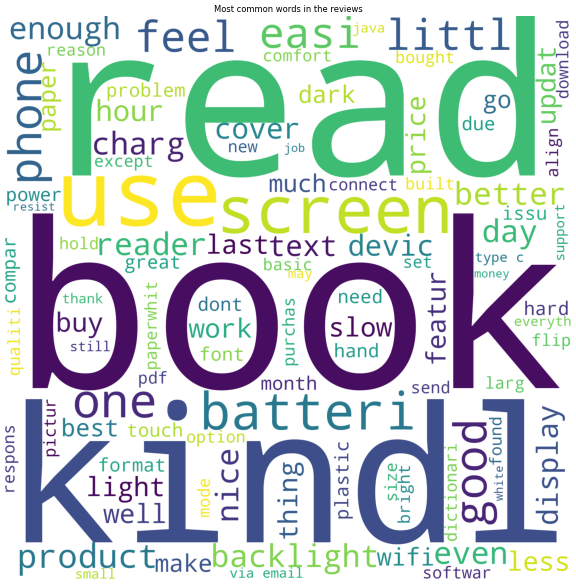

In [38]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(rv['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

# Sentiment Analysis

In [39]:
from textblob import TextBlob
rv['sentiment_score'] = rv['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
rv[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,built light,0.400000
1,connect wifi hotspot except phone easi read backlight good,0.700000
2,write confus kindl basic paperwhit money concern go paper white edit worthi better display water resist type c port better perform batteri read mode dark modebut kindl basic job compact except advantag mention pdf articl research paper kindl good book novel best feel book even better read dark night backlight bought kindl basic fulli satisfi purchas,0.263636
3,good qualiti look slow use accord brotherwhom gift appar work like,0.200000
4,absolut amazingbest invest ever,0.000000


In [40]:
## Defining function to assign sentiment category based on sentiment_score
## Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [41]:
rv['sentiment'] = rv['sentiment_score'].apply(lambda x:sentiment_category(x))

In [42]:
rv.head()

,Reviews,sentiment_score,sentiment
0,built light,0.400000,Neutral
1,connect wifi hotspot except phone easi read backlight good,0.700000,Positive
2,write confus kindl basic paperwhit money concern go paper white edit worthi better display water resist type c port better perform batteri read mode dark modebut kindl basic job compact except advantag mention pdf articl research paper kindl good book novel best feel book even better read dark night backlight bought kindl basic fulli satisfi purchas,0.263636,Neutral
3,good qualiti look slow use accord brotherwhom gift appar work like,0.200000,Neutral
4,absolut amazingbest invest ever,0.000000,Neutral


In [43]:
## calculating the categories of sentiments and their counts
rv['sentiment'].value_counts()

Neutral     26
Positive     3
Negative     1
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

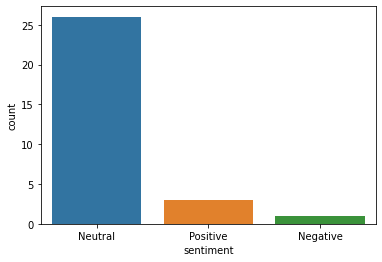

In [44]:
sns.countplot(x=rv['sentiment'])